In [1]:
!pip install statsmodels==0.14.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 159.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 73.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

import statsmodels.formula.api as smf
import sklearn.linear_model as lm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset
df = pd.read_csv("nba_2022-23_all_stats_with_salary.csv")

In [4]:
df

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


In [5]:
"""
Data is already organized, so no need for much data cleaning
All the numeric entries in the table are integers and floats, so no need for conversion
Dataset is recent (2022-2023), so no need to account for salary inflation
Goal is to find relationship between performance and salary from all NBA players for a certain season, so finding outliers isn't neccessary
Additionally, given small data sets, the exclusion of outliers (when not needed) will significantly impact our data analysis
Only required data cleaning steps are to check if there are duplicate players and fill out the missing entries
"""

"\nData is already organized, so no need for much data cleaning\nAll the numeric entries in the table are integers and floats, so no need for conversion\nDataset is recent (2022-2023), so no need to account for salary inflation\nGoal is to find relationship between performance and salary from all NBA players for a certain season, so finding outliers isn't neccessary\nAdditionally, given small data sets, the exclusion of outliers (when not needed) will significantly impact our data analysis\nOnly required data cleaning steps are to check if there are duplicate players and fill out the missing entries\n"

In [6]:
df.columns

Index(['Unnamed: 0', 'Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [7]:
# Drop 1st column, which is unnecessary
df = df.drop('Unnamed: 0', axis = 1)

In [8]:
# Check for duplicate rows
print(df["Player Name"].is_unique)

True


In [9]:
df.shape

(467, 51)

In [10]:
# There are 467 players in our dataset. In the actual NBA from 2022-2024, there were approximately 560 players

In [11]:
# Test to see how many rows don't have full data sets
no_nan = df.dropna()
no_nan.shape

(433, 51)

In [12]:
# There are 34 rows we need to fill in  with avg values

In [13]:
# Fill in missing entries with mean values
for column in list(df.columns):
    if column not in ["Player Name", "Position", "Team"]:
        df[column] = df[column].fillna(df[column].mean())

In [14]:
df

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


Text(0, 0.5, 'Salary (10^7 USD)')

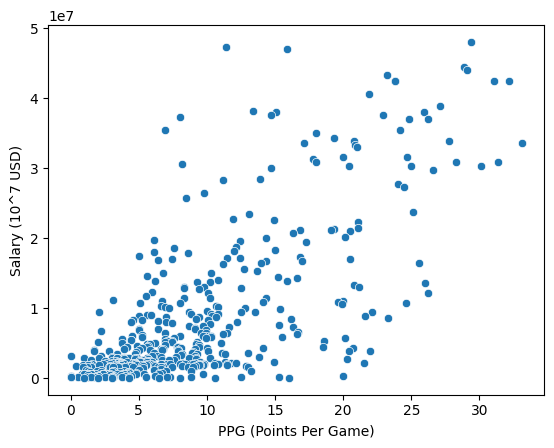

In [15]:
# Scatterplot of points per game vs. salary
# Weak, positive association
sns.scatterplot(data = df, x = "PTS", y = "Salary")
plt.xlabel("PPG (Points Per Game)")
plt.ylabel("Salary (10^7 USD)")

Text(0, 0.5, 'PPG')

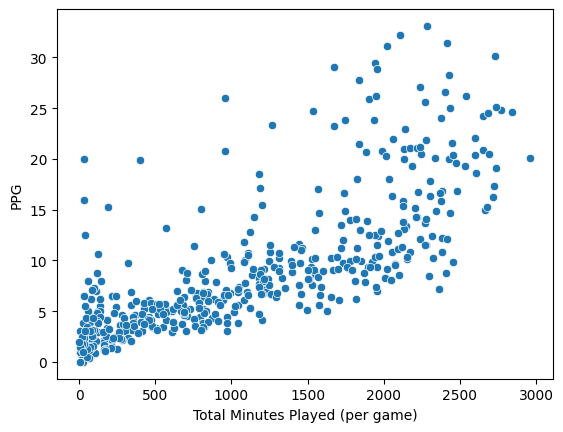

In [16]:
# Scatterplot of time played and points per game
# Maybe higher paid players play longer, which leads to higher points per game
# Raises a question of the confounding effects between salary, play time, points made
sns.scatterplot(data = df, x = "Total Minutes", y = "PTS")
plt.xlabel("Total Minutes Played (per game)")
plt.ylabel("PPG")

Text(0, 0.5, 'Number of Players')

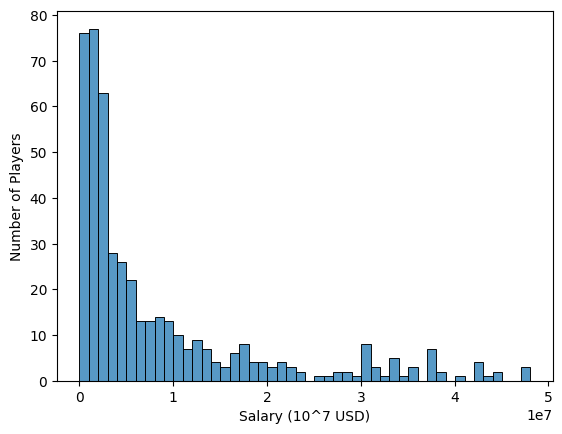

In [17]:
# Histogram of distribution of salaries
# Most players have a very low salary, while high salary is concentrated among a few players
sns.histplot(data = df, binwidth=1000000, x= "Salary")
plt.xlabel("Salary (10^7 USD)")
plt.ylabel("Number of Players")

Text(0, 0.5, 'Salary (in tens of millions of dollars)')

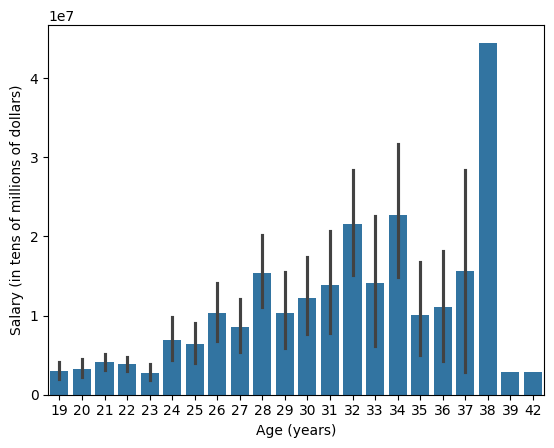

In [18]:
# Bar plot of age vs salary
# Salary tends to increase from when player enters league until age 34, then drops off
sns.barplot(data = df, x = "Age", y = "Salary")
plt.xlabel("Age (years)")
plt.ylabel("Salary (in tens of millions of dollars)")

<AxesSubplot: xlabel='Position', ylabel='Salary'>

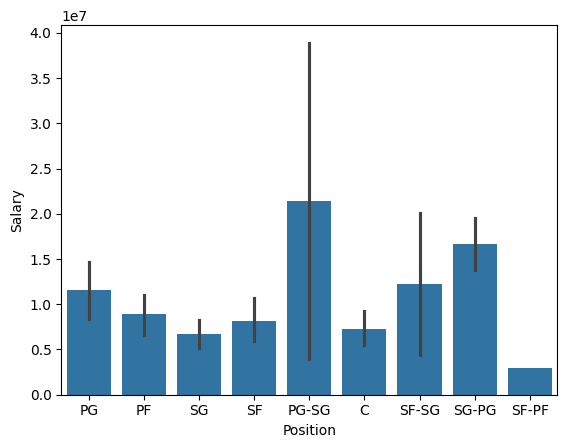

In [19]:
# Bar plot of position vs. salary
# Players that play multiple positions have a higher avg salary
sns.barplot(data = df, x = "Position", y = "Salary")

In [20]:
"""
Will playing multiple positions affect a player's salary?
Null hypothesis: there is no difference in the mean salary between players who play multiple positions 
vs. those who play one position
Alternative hypothesis: players who play multiple positions have a higher mean salary than those who play one position
Test statistic: difference in mean salary betwen multiple-position and single-position players; 
larger test statistic supports alternative hypothesis that observed mean difference is unlikely to happen 
under null hypothesis
"""
# Filter players by single and multiple positions
multiple_position_salaries = df[df['Position'].isin(["PG-SG", "SF-SG", "SG-PG", "SF-PF"])]['Salary']
single_position_salaries = df[df['Position'].isin(["PG", "SG", "SF", "PF", "C"])]['Salary']

# Observed test statistics
multiple_position_mean = np.mean(multiple_position_salaries)
single_position_mean = np.mean(single_position_salaries)
observed_test_stat = multiple_position_mean - single_position_mean

#Perform Simulation
simulations = []
for i in range(10000):
    shuffled = df["Salary"].sample(n = len(df))
    shuffled.reset_index(inplace=True, drop=True)
    df["shuffled_position"] = shuffled
    new_multiposition = df[df['Position'].isin(["PG-SG", "SF-SG", "SG-PG", "SF-PF"])]
    new_singleposition = df[df['Position'].isin(["PG", "SG", "SF", "PF", "C"])]
    multiple_salary_mean = np.mean(new_multiposition["shuffled_position"])
    single_salary_mean = np.mean(new_singleposition["shuffled_position"])
    test_stat = multiple_salary_mean - single_salary_mean
    simulations.append(test_stat)

In [21]:
# visualize distribution of test statistic
#simulations = np.array(simulations)
#plt.hist(simulations);
#plt.axvline(x = multiple_position_mean - single_position_mean, color ='red');

In [22]:
# P-value calculation with alpha value of 0.05
#p_value = sum(simulations >= observed_test_stat)/ len(simulations)
#p_value

In [23]:
# Since p-value > 0.05, we fail to reject the null hypothesis. 
# There is no statistically significant evidence that the mean salary differes between multiple-position and single-position players

In [24]:
df.drop(columns=["Team", "Player Name", "Position"], inplace=True)

<AxesSubplot: >

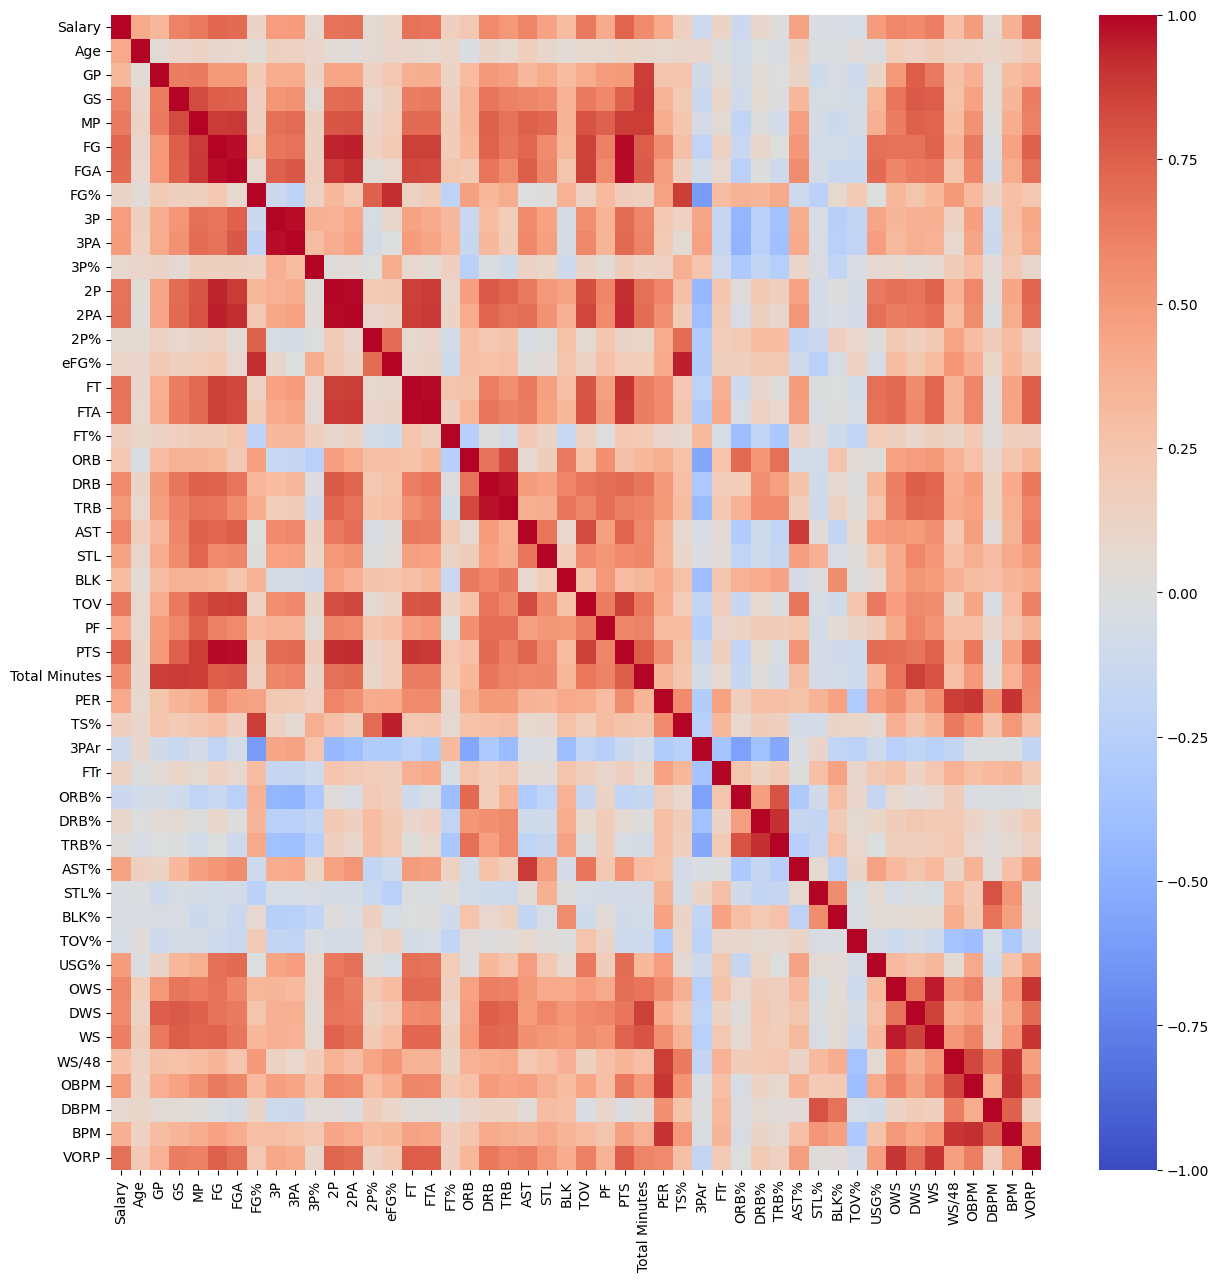

In [25]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
#new_tvratings_variables = pd.get_dummies(new_tvratings,columns=['US_or_other'])
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm')

In [26]:
len(df)

467

In [27]:
df

,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,48070014,34,56,56,34.7,10.0,20.2,0.493,4.9,11.4,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,47345760,32,34,3,22.2,4.1,9.9,0.408,1.0,3.2,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,47080179,34,73,24,29.1,5.9,13.6,0.436,1.2,3.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,44474988,38,55,54,35.5,11.1,22.2,0.500,2.2,6.9,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,44119845,34,47,47,35.6,10.3,18.3,0.560,2.0,4.9,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,35096,23,4,0,22.3,1.8,5.8,0.304,0.8,3.0,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,32795,25,5,0,5.6,0.2,1.2,0.167,0.2,1.0,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,32171,29,3,0,18.7,2.7,7.0,0.381,2.0,6.0,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,5849,23,1,0,35.0,6.0,12.0,0.500,2.0,5.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


In [28]:
# Feature Selection for Linear Regression Model
import statsmodels.regression.linear_model as sm 
X = df.drop('Salary', axis = 1)
y = df["Salary"]
# add a column of ones as integer data type 
x = np.append(arr = np.ones((467, 1)).astype(int),  
              values = df.drop('Salary', axis = 1), axis = 1) 
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
x_opt = x[:, [i for i in range(len(df.columns))]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 
pvalues = ols.pvalues


In [29]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     21.07
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.74e-83
Time:                        07:46:54   Log-Likelihood:                -7938.0
No. Observations:                 467   AIC:                         1.597e+04
Df Residuals:                     419   BIC:                         1.617e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.709e+06   7.69e+06     -1.262      0.208   -2.48e+07    5.41e+06
x1          8.105e+05   7.39e+04     10.967      0.000    6.65e+05    9.56e+05
x2         -4220.4841   4.14e+04     -0.102      0.919   -8.55e+04    7.71e+04
x3          5.901e+04   2.95e+04      2.002      0.046    1085.062    1.17e+05
x4          2.944e+04   2.36e+05      0.125      0.901   -4.34e+05    4.93e+05
x5          5.335e+06   9.88e+06      0.540      0.590   -1.41e+07    2.48e+07
x6         -1.349e+06   6.39e+06     -0.211      0.833   -1.39e+07    1.12e+07
x7          3.161e+07   4.61e+07      0.685      0.494   -5.91e+07    1.22e+08
x8         -1.187e+07   8.23e+06     -1.441      0.150   -2.81e+07    4.32e+06
x9          8.209e+05   6.38e+06      0.129      0.898   -1.17e+07    1.34e+07
x10        -6.098e+06   3.47e+06     -1.757      0.080   -1.29e+07    7.22e+05
x11        -9.759e+06   6.69e+06     -1.459      0.145   -2.29e+07    3.39e+06
x12         1.217e+06   6.44e+06      0.189      0.850   -1.14e+07    1.39e+07
x13        -7.068e+06   5.05e+06     -1.401      0.162    -1.7e+07    2.85e+06
x14        -2.545e+07   4.53e+07     -0.562      0.574   -1.14e+08    6.36e+07
x15        -1.303e+06   4.51e+06     -0.289      0.773   -1.02e+07    7.55e+06
x16        -6.739e+05   1.71e+06     -0.395      0.693   -4.03e+06    2.68e+06
x17        -2.628e+06   3.38e+06     -0.777      0.437   -9.27e+06    4.02e+06
x18        -2.467e+06   5.77e+06     -0.428      0.669   -1.38e+07    8.87e+06
x19            -1e+06   5.75e+06     -0.174      0.862   -1.23e+07    1.03e+07
x20         1.455e+06   5.73e+06      0.254      0.800    -9.8e+06    1.27e+07
x21         5.349e+05   8.61e+05      0.621      0.535   -1.16e+06    2.23e+06
x22           1.1e+06   2.23e+06      0.492      0.623   -3.29e+06    5.49e+06
x23         3.852e+06   2.11e+06      1.824      0.069   -2.99e+05       8e+06
x24         1.121e+06    1.9e+06      0.590      0.555   -2.61e+06    4.85e+06
x25        -7.374e+05    8.5e+05     -0.868      0.386   -2.41e+06    9.33e+05
x26          2.81e+06   4.19e+06      0.671      0.502   -5.42e+06     1.1e+07
x27        -1053.9074   2659.997     -0.396      0.692   -6282.509    4174.694
x28        -1.252e+06   5.46e+05     -2.292      0.022   -2.33e+06   -1.78e+05
x29         6.312e+06   2.95e+07      0.214      0.831   -5.16e+07    6.42e+07
x30         1.215e+06   8.21e+06      0.148      0.882   -1.49e+07    1.74e+07
x31        -2.021e+06   3.16e+06     -0.640      0.523   -8.23e+06    4.19e+06
x32        -1.825e+06   1.33e+06     -1.376      0.170   -4.43e+06    7.82e+05
x33        -1.897e+06   1.27e+06     -1.494      0.136   -4.39e+06    5.98e+05
x34         3.883e+06   2.55e+06      1.520      0.129   -1.14e+06     8.9e+06
x35        -1.293e+05   1.19e+05     -1.088      0.277   -3.63e+05    1.04e+05
x3

In [30]:
old_columns = X.columns
for i in range(1, len(pvalues)-1):
    if pvalues.iloc[i] > 0.05:
        X = X.drop(old_columns[i], axis = 1)

In [31]:
X

,Age,GP,MP,TS%,OWS
0,34,56,34.7,0.656,5.8
1,32,34,22.2,0.498,-0.4
2,34,73,29.1,0.513,-0.6
3,38,55,35.5,0.583,3.2
4,34,47,35.6,0.677,4.7
...,...,...,...,...,...
462,23,4,22.3,0.363,-0.2
463,25,5,5.6,0.363,0.0
464,29,3,18.7,0.548,0.1
465,23,1,35.0,0.621,0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6831919717497246

Text(0.5, 1.0, 'Residual Plot')

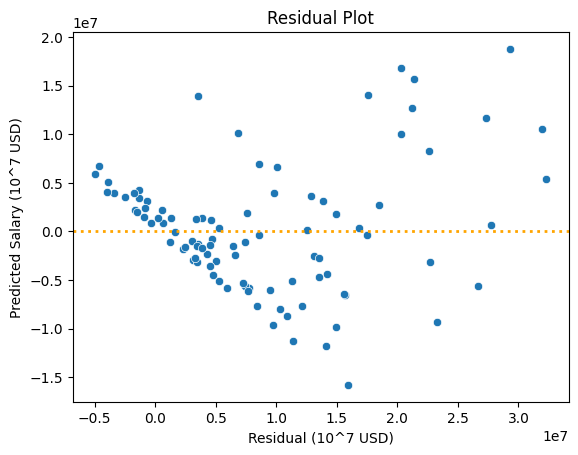

In [33]:
y_hat = model.predict(X_test)
residual = y_test - y_hat
sns.scatterplot(x = y_hat, y = residual)
plt.axhline(y = 0, linewidth = 2, color = 'orange', ls = ':')
plt.xlabel("Residual (10^7 USD)")
plt.ylabel("Predicted Salary (10^7 USD)")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Predicted V. Actual Salary')

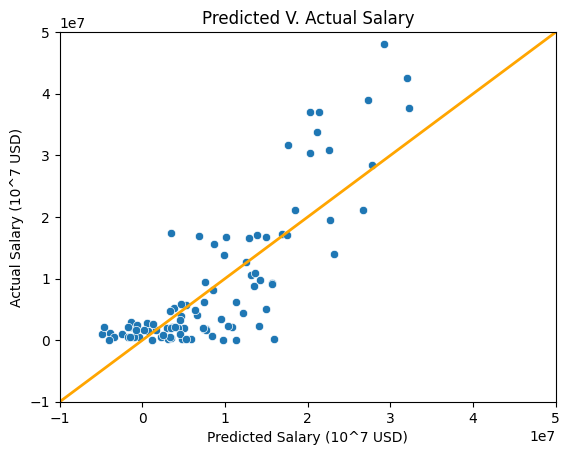

In [34]:
sns.scatterplot(x = y_hat, y = y_test)
plt.plot([-1 * 10e6, 5 * 10e6], [-1 * 10e6, 5 * 10e6], linewidth = 2, color = 'orange')
plt.xlabel("Predicted Salary (10^7 USD)")
plt.ylabel("Actual Salary (10^7 USD)")
plt.xlim(-1 * 10e6, 5 * 10e6)
plt.ylim(-1 * 10e6, 5 * 10e6)
plt.title("Predicted V. Actual Salary")

In [35]:
# Linear regression model that uses pts and assist to predict salary

# Get training data
X = df[["PTS", "AST"]]
Y = df[['Salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train data
model = LinearRegression()
model.fit(X_train, y_train)
# Score model
model.score(X_test, y_test)

0.722491102533684

In [36]:
# Get coefficients and intercept of regression plane
coef_x, coef_y = model.coef_
intercept = model.intercept_

In [37]:
import plotly.graph_objects as go

# Scatter points
x_vals = df["PTS"]
y_vals = df["AST"]
z_vals = df["Salary"]

# Create a meshgrid for plotting the regression plane
x_range = np.linspace(df['PTS'].min(), df['PTS'].max(), 10)
y_range = np.linspace(df['AST'].min(), df['AST'].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Calculate the z values for the regression plane
z_grid = coef_x * x_grid + coef_y * y_grid + intercept

# # Plotting
fig = go.Figure()

# Add scatter plot of actual data points
fig.add_trace(go.Scatter3d(x=x_vals, y=y_vals, z=z_vals, mode='markers', marker=dict(size=5, color='blue'), name='Data Points'))

# Add prediction plane
fig.add_trace(go.Surface(x=x_grid, y=y_grid, z=z_grid, surfacecolor=np.ones_like(y_grid), colorscale=[[0, 'lightblue'], [1, 'lightblue']], opacity=0.7, name='Prediction Plane'))

# Update layout with axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='Points Per Game',
        yaxis_title='Assists Per Game',
        zaxis_title='Salary'
    ),
    title='3D Scatter Plot of Salary with Prediction Plane',
    showlegend=True
)

fig.show()

In [38]:
# R^2 = 0.77 ==> 77% of variation in salary can be accounted for by points per game and assists

In [39]:
"""
Random forest regression model: 
Uses multiple decision trees to predict salary from various features, and averages these predictions
Feature selection is built in
"""

# Get training data
X = df.drop("Salary", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train data
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7590494420964611

In [40]:
# Cross-validation with 5 folds
scores = cross_val_score(RandomForestRegressor(), X_train, y_train, cv = 5, scoring = "r2")
scores

array([0.6752752 , 0.70541939, 0.62613156, 0.81425192, 0.57677336])

In [41]:
scores.mean()

0.6795702854795171

[Text(0.7633824208708226, 0.9782608695652174, 'X[18] <= 6.05\nsquared_error = 115982112727700.34\nsamples = 233\nvalue = 8446454.552'),
 Text(0.5833201116645245, 0.9347826086956522, 'X[8] <= 3.05\nsquared_error = 72529222663237.1\nsamples = 218\nvalue = 6674649.442'),
 Text(0.44652454209511566, 0.8913043478260869, 'X[23] <= 2.15\nsquared_error = 14514372960588.143\nsamples = 137\nvalue = 3392155.333'),
 Text(0.39896168059125964, 0.8478260869565217, 'X[39] <= 3.35\nsquared_error = 9099214577250.752\nsamples = 135\nvalue = 3156381.279'),
 Text(0.31617528920308485, 0.8043478260869565, 'X[18] <= 4.25\nsquared_error = 6037178026971.842\nsamples = 129\nvalue = 2829973.052'),
 Text(0.18762050128534705, 0.7608695652173914, 'X[9] <= 0.606\nsquared_error = 4992555594235.11\nsamples = 123\nvalue = 2614392.832'),
 Text(0.1835073907455013, 0.717391304347826, 'X[26] <= 108.0\nsquared_error = 4295334498102.453\nsamples = 122\nvalue = 2528384.16'),
 Text(0.07403598971722365, 0.6739130434782609, 'X[44]

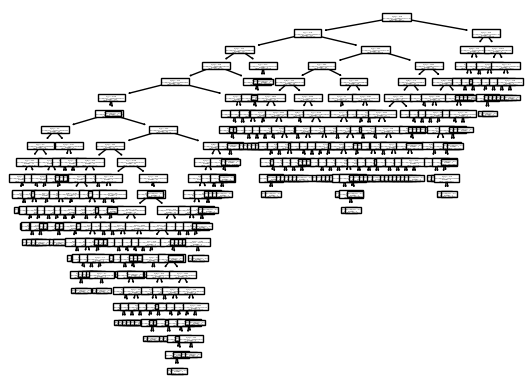

In [42]:
# Cisualize decision tree
from sklearn import tree
tree.plot_tree(model.estimators_[0])

In [43]:
print(df.columns.tolist())

['Salary', 'Age', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']


In [44]:
df['Fair_Salary'] = model.predict(X)
df

,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Fair_Salary
0,48070014,34,56,56,34.7,10.0,20.2,0.493,4.9,11.4,...,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7,39182843.68
1,47345760,32,34,3,22.2,4.1,9.9,0.408,1.0,3.2,...,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1,40693891.43
2,47080179,34,73,24,29.1,5.9,13.6,0.436,1.2,3.9,...,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2,41964880.19
3,44474988,38,55,54,35.5,11.1,22.2,0.500,2.2,6.9,...,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0,42933983.75
4,44119845,34,47,47,35.6,10.3,18.3,0.560,2.0,4.9,...,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9,42011845.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,35096,23,4,0,22.3,1.8,5.8,0.304,0.8,3.0,...,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2,3310574.75
463,32795,25,5,0,5.6,0.2,1.2,0.167,0.2,1.0,...,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0,339812.84
464,32171,29,3,0,18.7,2.7,7.0,0.381,2.0,6.0,...,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0,7082985.42
465,5849,23,1,0,35.0,6.0,12.0,0.500,2.0,5.0,...,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0,3848454.71


In [45]:
overpaid = []

for i in range(len(df["Salary"])):
    if df["Salary"][i] < 0.7 * df["Fair_Salary"][i]:
        overpaid.append("underpaid")
    elif df["Salary"][i] > 1.3 * df["Fair_Salary"][i]:
        overpaid.append("overpaid")
    else:
        overpaid.append("fairly paid")

df["paid"] = overpaid

In [46]:
df

,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Fair_Salary,paid
0,48070014,34,56,56,34.7,10.0,20.2,0.493,4.9,11.4,...,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7,39182843.68,fairly paid
1,47345760,32,34,3,22.2,4.1,9.9,0.408,1.0,3.2,...,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1,40693891.43,fairly paid
2,47080179,34,73,24,29.1,5.9,13.6,0.436,1.2,3.9,...,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2,41964880.19,fairly paid
3,44474988,38,55,54,35.5,11.1,22.2,0.500,2.2,6.9,...,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0,42933983.75,fairly paid
4,44119845,34,47,47,35.6,10.3,18.3,0.560,2.0,4.9,...,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9,42011845.90,fairly paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,35096,23,4,0,22.3,1.8,5.8,0.304,0.8,3.0,...,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2,3310574.75,underpaid
463,32795,25,5,0,5.6,0.2,1.2,0.167,0.2,1.0,...,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0,339812.84,underpaid
464,32171,29,3,0,18.7,2.7,7.0,0.381,2.0,6.0,...,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0,7082985.42,underpaid
465,5849,23,1,0,35.0,6.0,12.0,0.500,2.0,5.0,...,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0,3848454.71,underpaid


In [47]:
new_df=df.drop("paid",axis=1)
correlation_matrix = new_df.corr()

# Extract correlation values with 'Salary' and sort them in descending order
salary_correlations = correlation_matrix['Salary'].sort_values(ascending=False)
high_correlation_features = salary_correlations[salary_correlations > 0.4].sort_values(ascending=False)


# Convert to DataFrame for easier readability
high_correlation_features = high_correlation_features.reset_index()
high_correlation_features.columns = ['Feature', 'Correlation with Salary']

# Display the result
print(high_correlation_features)

          Feature  Correlation with Salary
0          Salary                 1.000000
1     Fair_Salary                 0.958775
2             PTS                 0.727597
3              FG                 0.720260
4             FGA                 0.706393
5             2PA                 0.681926
6            VORP                 0.680339
7              2P                 0.676406
8              FT                 0.673772
9             FTA                 0.668638
10            TOV                 0.646808
11             MP                 0.642099
12             WS                 0.624664
13             GS                 0.602267
14            AST                 0.593971
15            OWS                 0.582416
16            DRB                 0.576596
17            DWS                 0.566990
18  Total Minutes                 0.565897
19            TRB                 0.503633
20            3PA                 0.491569
21           USG%                 0.488063
22         

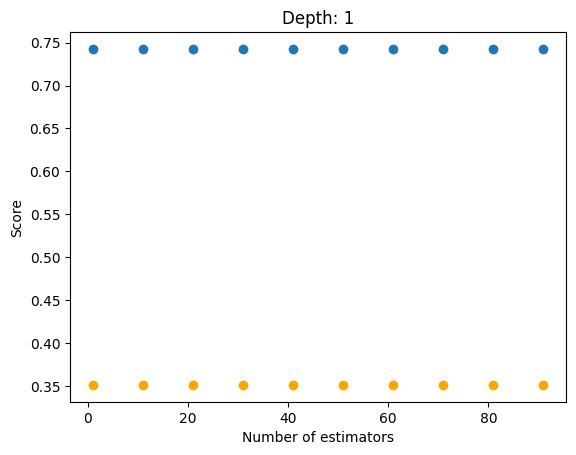

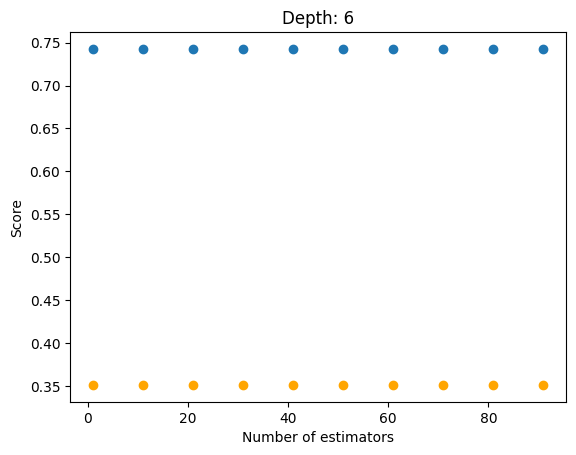

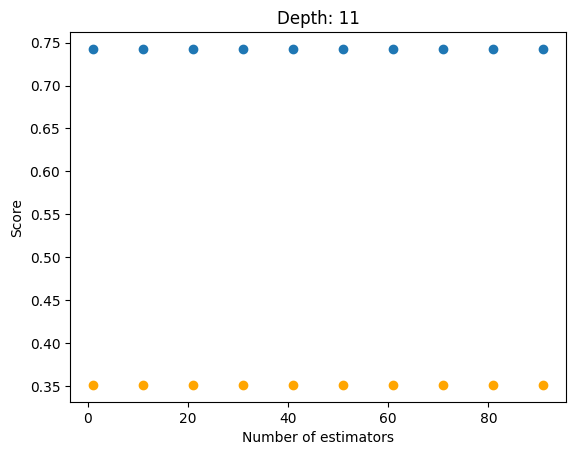

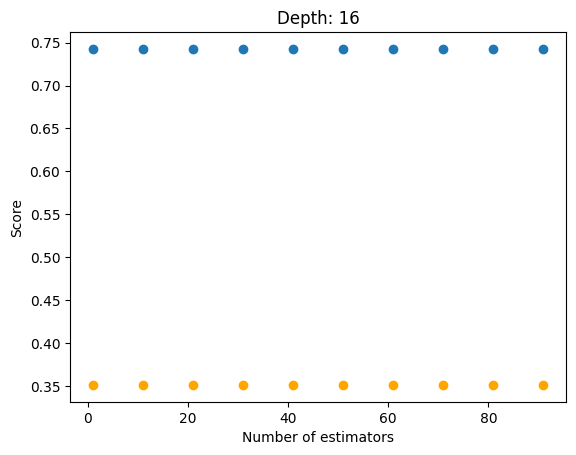

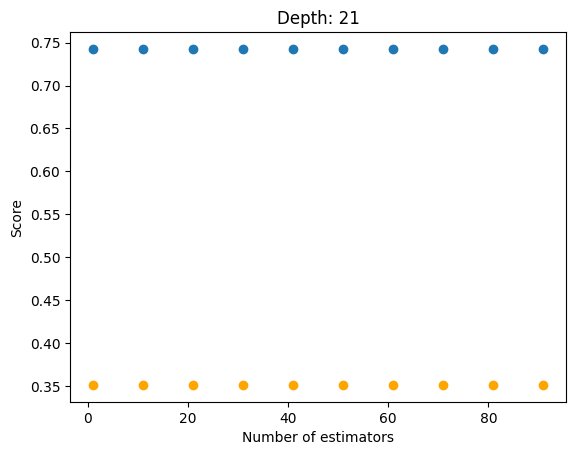

Max test accuracy: {'score': 0.35106382978723405, 'estimators': 1, 'max_depth': 1}


RandomForestClassifier(max_depth=1, n_estimators=1)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error as mse, accuracy_score


X = df[high_correlation_features]
y = df["paid"]
# Do a train-test split
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Do a train-test split
class_X_train, class_X_test, class_Y_train, class_Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators=np.arange(1,100,10)
depths = np.arange(1,25,5)
depth_train_scores = np.zeros(shape=(len(depths),len(estimators)))
depth_test_scores = np.zeros(shape=(len(depths),len(estimators)))
max_test_score = {"score":0}
for i in range(0,len(estimators)):
    estimator = estimators[i]
    for j in range(0,len(depths)):
        depth = depths[j]
        
        forest = RandomForestClassifier(n_estimators=estimator,max_depth=depth)
        forest.fit(class_X_train,class_Y_train)
        #print("Estimators: " + str(estimator) + ", Max depth: " + str(depth))
        
        train_score = accuracy_score(class_Y_train,forest.predict(class_X_train))
        #print("training score " + str(train_score))
        depth_train_scores[j][i] = train_score
        
        test_score = accuracy_score(class_Y_test,forest.predict(class_X_test))
        #print("testing score " + str(test_score))
        depth_test_scores[j][i] = test_score
        if test_score > max_test_score['score']:
            max_test_score = {"score":test_score,"estimators":estimator,"max_depth":depth}

for i in range(0,len(depth_train_scores)):
    depth = depth_train_scores[i]
    plt.scatter(estimators,depth)
    depth2 = depth_test_scores[i]
    plt.scatter(estimators,depth2,color="orange")
    plt.title("Depth: " + str(depths[i]))
    plt.xlabel("Number of estimators")
    plt.ylabel("Score")
    plt.show()
    
print("Max test accuracy: " + str(max_test_score))
best_model = RandomForestClassifier(n_estimators=max_test_score['estimators'],max_depth=max_test_score['max_depth'])
best_model.fit(class_X_train,class_Y_train)

Top important features:
   Feature  Importance
3       MP    0.224391
0      Age    0.209833
11     2PA    0.086289
23     TOV    0.058373
25     PTS    0.033449
5      FGA    0.029783
15     FTA    0.029661
14      FT    0.025628
10      2P    0.024295
4       FG    0.023888


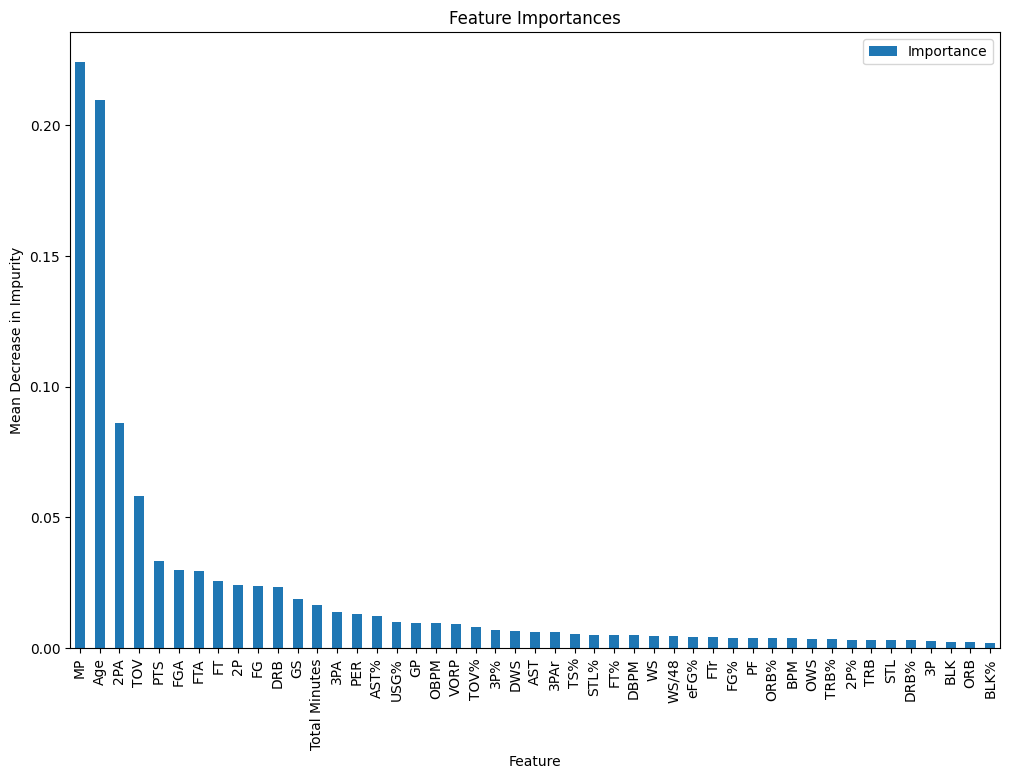

In [49]:
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy sorting and viewing
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top important features:")
print(feature_importances.head(10))  # Adjust the number as needed

# Plot if needed
feature_importances.set_index('Feature').plot(kind='bar', figsize=(12, 8))
plt.title("Feature Importances")
plt.ylabel("Mean Decrease in Impurity")
plt.show()

In [50]:
!pip install xgboost==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [51]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 31.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [52]:
!pip install imblearn==0.0


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [53]:
!pip install xgboost==2.1.2


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


# Split data into features (X) and target (y)
X = df.drop(columns=["paid", "Fair_Salary"])  # Replace "paid" with your target column
y = df["paid"]  # Target variable (overpaid, underpaid, fairly paid)

# Encode target variable if it's categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts to 0, 1, 2 for each class

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define and train XGBoost model
model = XGBClassifier(
    objective="multi:softmax",  # Multiclass classification
    num_class=3,  # Number of classes (overpaid, underpaid, fairly paid)
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,  # Maximum depth of trees
    learning_rate=0.1,  # Step size shrinkage
    use_label_encoder=False,  # Newer versions of XGBoost don't need this
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

/root/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[07:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


Confusion Matrix:
 [[55  0  7]
 [ 5  0  0]
 [ 9  0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        62
           1       0.00      0.00      0.00         5
           2       0.72      0.67      0.69        27

    accuracy                           0.78        94
   macro avg       0.51      0.52      0.51        94
weighted avg       0.73      0.78      0.75        94


Accuracy: 0.776595744680851
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/shared-libs/python3.9/py/lib/python3.9/site-packages/skle

In [56]:
! pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 13.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


<Figure size 1000x8000 with 0 Axes>

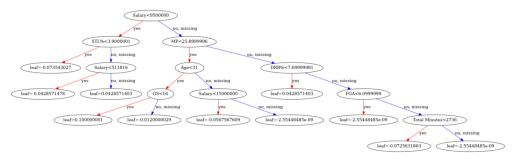

In [77]:
# plot decision tree
from xgboost import plot_tree
# load data
plt.figure(figsize=(10, 80))  
plot_tree(model, num_trees=1) 
plt.show()

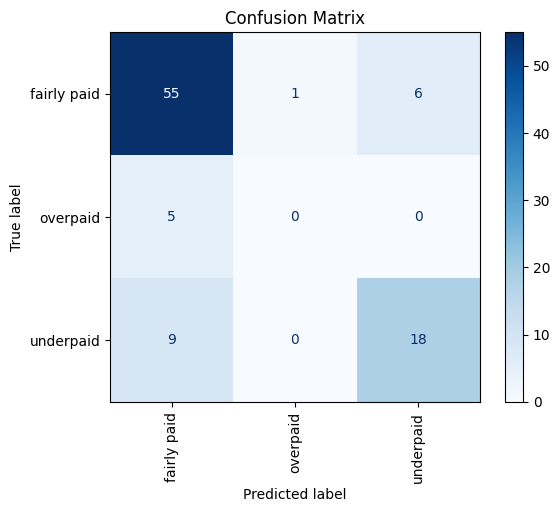

array([[55,  1,  6],
       [ 5,  0,  0],
       [ 9,  0, 18]])

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()

confusion

In [56]:
#Accuracy
accuracy = (confusion[0][0] + confusion[1][1] + confusion[2][2]) / (sum(confusion[0]) + sum(confusion[1]) + sum(confusion[2]))
# Precision
precision = confusion[0][0] / (confusion[0][0] + confusion[1][0] + confusion[2][0])
print(accuracy, precision)

0.776595744680851 0.7971014492753623


In [57]:
# True fairly paid rate
true_fair = confusion[0][0] / sum(confusion[0])
# True overpaid rate
true_overpaid = confusion[1][1] / sum(confusion[1])
# True underpaid rate
true_underpaid = confusion[2][2] / sum(confusion[2])
print(true_fair, true_overpaid, true_underpaid)

0.8870967741935484 0.0 0.6666666666666666


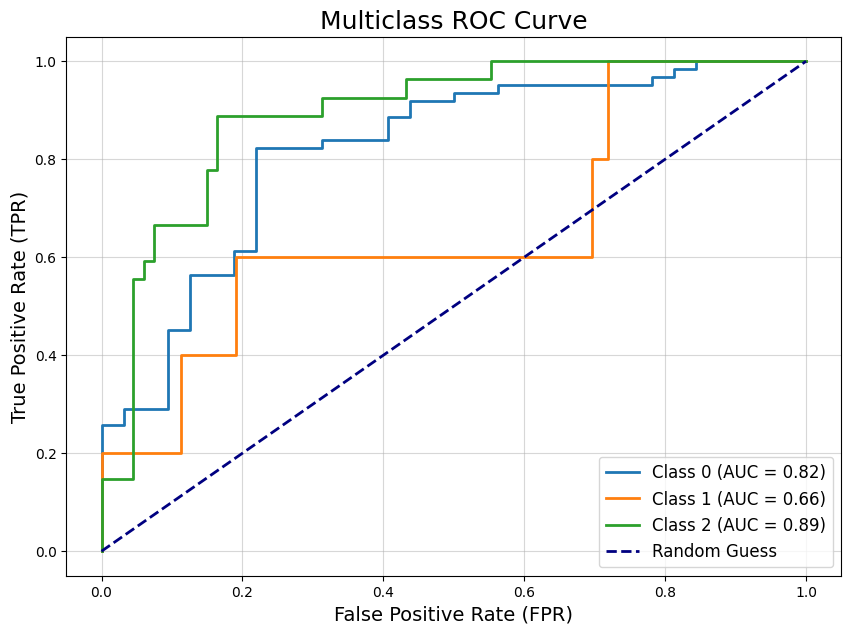

In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the test labels for multiclass classification
y_test_binarized = label_binarize(y_test, classes=np.arange(3))  # Assuming 3 classes: 0, 1, 2

# Predict probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(3):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])  # Compute FPR and TPR
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Add labels, title, and legend
plt.title("Multiclass ROC Curve", fontsize=18)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

Top important features:
          Feature  Importance
0          Salary    0.082414
27  Total Minutes    0.060994
4              MP    0.043414
26            PTS    0.040602
5              FG    0.039144
37           BLK%    0.031496
6             FGA    0.028689
40            OWS    0.028252
42             WS    0.028100
19            DRB    0.024888


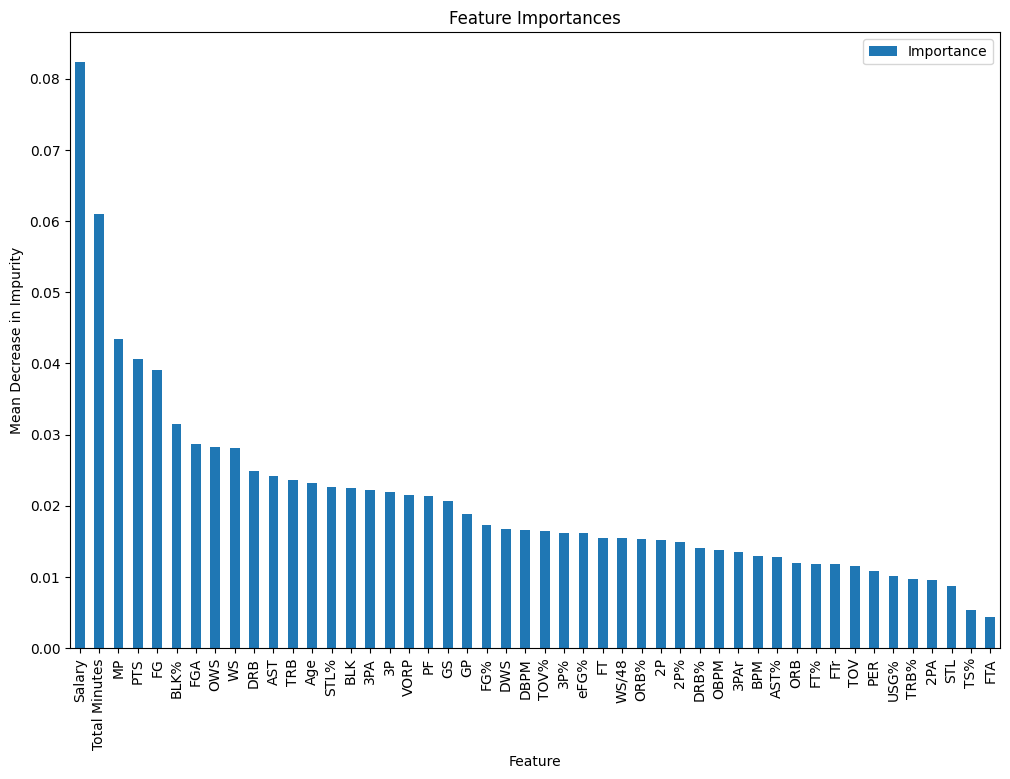

In [79]:
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy sorting and viewing
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top important features:")
print(feature_importances.head(10))  # Adjust the number as needed

# Plot if needed
feature_importances.set_index('Feature').plot(kind='bar', figsize=(12, 8))
plt.title("Feature Importances")
plt.ylabel("Mean Decrease in Impurity")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=601cc2b2-23f1-402d-98d4-7a96090fb50d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>